In [ ]:
#!pip install pycountry-convert
#!pip install geopy

In [ ]:
# imports
import os
import pandas as pd
from pandas.io.json import build_table_schema
import numpy as np
import markdown
import missingno as msno  

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')


import pycountry_convert as pc
from geopy.geocoders import Nominatim

%matplotlib inline

In [ ]:
running_in_drive = True
if running_in_drive:
  import os
  os.chdir("/content/drive/MyDrive/GA/capstone/code")

# environment variables
DATA_PATH = '../data'
ORIGINAL_DATA_PATH = f'{DATA_PATH}/original/csv_offshore_leaks'
CLEAN_DATA_PATH = f'{DATA_PATH}/clean/csv_offshore_leaks'
NODE_EDGES_PATH = f'{DATA_PATH}/clean/csv_offshore_leaks/nodes_edges'
IMAGE_PATH = '../presentation/images'
MD_PATH = '../presentation/tables'

In [ ]:
# helpers

def get_original_file_paths():
  file_names = os.listdir(ORIGINAL_DATA_PATH)
  return {f"{'_'.join(n.split('.')[1:-1])}": f'{ORIGINAL_DATA_PATH}/{n}' for n in file_names} 


def read_original_dataframes():
  paths = get_original_file_paths()
  data_frames = {}
  for name, path in paths.items():
    data_frames[name] = pd.read_csv(path)
  
  return data_frames

def get_clean_file_paths():
  file_names = os.listdir(CLEAN_DATA_PATH)
  return {f"{n.split('.')[0]}": f'{CLEAN_DATA_PATH}/{n}' for n in file_names if n.endswith('.csv')} 


def read_clean_dataframes():
  paths = get_clean_file_paths()
  data_frames = {}
  for name, path in paths.items():
    data_frames[name] = pd.read_csv(path)
  
  return data_frames


def print_unique_items(df):
  to_drop = []
  nunique = df.nunique().to_dict()
  for k, v in nunique.items():
    if v<=1:
      to_drop.append(k)
    if v == 1:
      print(f'\n\tThere is {v} value for "{k}":\n\t\t{df.head(1)[k].values[0]}')
    elif v < 5:
      print(f'\n\tThere are {v} values for "{k}"')
      for value in df[k].unique().tolist():
        print(f'\t\t{value}')
  if len(to_drop)>0:
    print('\n\tdrop ', to_drop)
  return to_drop

def get_common_between_lists(lists):
  common = set(lists[0])
  for l in lists[1:]:
    common = common.intersection(l)
  return list(common)




def plot_missing_dendrogram(df, name, nan_threshold=0, conversions={}, is_clean=False):
    """
    Method for plotting dendrogram of missing values.
    """

    null_df = df.copy()
    null_df = null_df.rename(columns = conversions)
    g = msno.dendrogram(null_df, figsize=(8,5), orientation='top'); 
    g.set(yticklabels=[])
    s = null_df.isnull().sum().sum()
    name_to_show = name.replace('_', ' ')
    plt.title(f'Null Values in "{name}" - Count: {s}', fontsize=30)
    plt.savefig(f'{IMAGE_PATH}/null_dendogram_{"clean" if is_clean else "original"}_{name}.png', bbox_inches='tight', dpi=300)





def country_to_continent(country_name):
  """
  Taken with modification from https://stackoverflow.com/questions/55910004/get-continent-name-from-country-using-pycountry
  example: country_to_continent('British Virgin Islands')
  """
  try:
    if len(country_name.split(';'))>1:
      return ';'.join([country_to_continent(c) for c in country_name.split(';')])
  except Exception as e:
    return country_name

  try:
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name
  except Exception as e:
    return country_name




def get_longitude_latitude(address):
  geolocator = Nominatim(user_agent="http")
  location = geolocator.geocode(address)
  if location!=None:
    return {
        'latitude':location.latitude,
        'longitude':location.longitude
    }

In [ ]:
paths = get_original_file_paths()
data_frames = read_original_dataframes()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [ ]:
to_drop_dict = {}
for name, df in data_frames.items():
  print(f'\n\n{name}:')
  to_drop = print_unique_items(df)
  to_drop_dict.update({name: to_drop})

common_to_drop_columns = get_common_between_lists(list(to_drop_dict.values()))
print(common_to_drop_columns)
print(to_drop_dict)

clean_data_frames = {}

for name, df in data_frames.items():
  df_new = df.copy().drop(columns=to_drop_dict[name])
  print(df_new.shape)
  df_new.drop_duplicates(inplace = True)
  print(df_new.shape)
  if 'node_id' in df_new.columns:
    if df_new['node_id'].isnull().sum()>0:
      display(df_new['node_id'].isnull().sum())
  clean_data_frames.update({name: df_new})


for name, df in clean_data_frames.items():
  print(f'\n\n{name}:')
  print_unique_items(df)
  df.to_csv(f'{CLEAN_DATA_PATH}/{name}.csv', index=False)



nodes_address:

	There are 0 values for "name"
		nan

	There is 1 value for "sourceID":
		Offshore Leaks

	There is 1 value for "valid_until":
		The Offshore Leaks data is current through 2010

	There are 0 values for "note"
		nan

	drop  ['name', 'sourceID', 'valid_until', 'note']


nodes_intermediary:

	There are 0 values for "status"
		nan

	There is 1 value for "sourceID":
		Offshore Leaks

	There is 1 value for "valid_until":
		The Offshore Leaks data is current through 2010

	There is 1 value for "note":
		nan

	drop  ['status', 'sourceID', 'valid_until', 'note']


nodes_officer:

	There is 1 value for "sourceID":
		Offshore Leaks

	There is 1 value for "valid_until":
		The Offshore Leaks data is current through 2010

	There is 1 value for "note":
		nan

	drop  ['sourceID', 'valid_until', 'note']


edges:

	There are 4 values for "TYPE"
		registered_address
		officer_of
		intermediary_of
		underlying

	There is 1 value for "sourceID":
		Offshore Leaks

	There is 1 value for "va

In [ ]:
to_drop_dict = {}
for name, df in data_frames.items():
  print(f'\n\n{name}:')
  to_drop = print_unique_items(df)
  to_drop_dict.update({name: to_drop})

common_to_drop_columns = get_common_between_lists(list(to_drop_dict.values()))



nodes_address:

	There are 0 values for "name"
		nan

	There is 1 value for "sourceID":
		Offshore Leaks

	There is 1 value for "valid_until":
		The Offshore Leaks data is current through 2010

	There are 0 values for "note"
		nan

	drop  ['name', 'sourceID', 'valid_until', 'note']


nodes_intermediary:

	There are 0 values for "status"
		nan

	There is 1 value for "sourceID":
		Offshore Leaks

	There is 1 value for "valid_until":
		The Offshore Leaks data is current through 2010

	There is 1 value for "note":
		nan

	drop  ['status', 'sourceID', 'valid_until', 'note']


nodes_officer:

	There is 1 value for "sourceID":
		Offshore Leaks

	There is 1 value for "valid_until":
		The Offshore Leaks data is current through 2010

	There is 1 value for "note":
		nan

	drop  ['sourceID', 'valid_until', 'note']


edges:

	There are 4 values for "TYPE"
		registered_address
		officer_of
		intermediary_of
		underlying

	There is 1 value for "sourceID":
		Offshore Leaks

	There is 1 value for "va

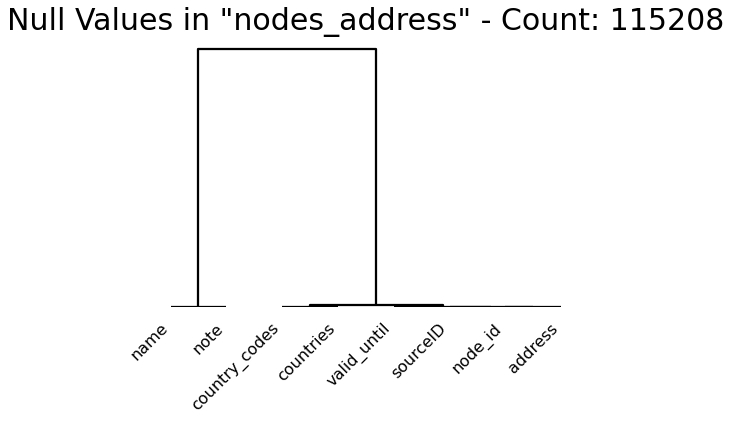

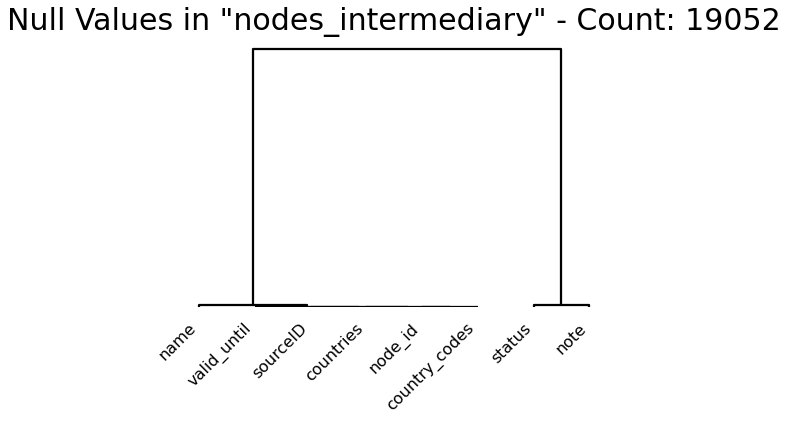

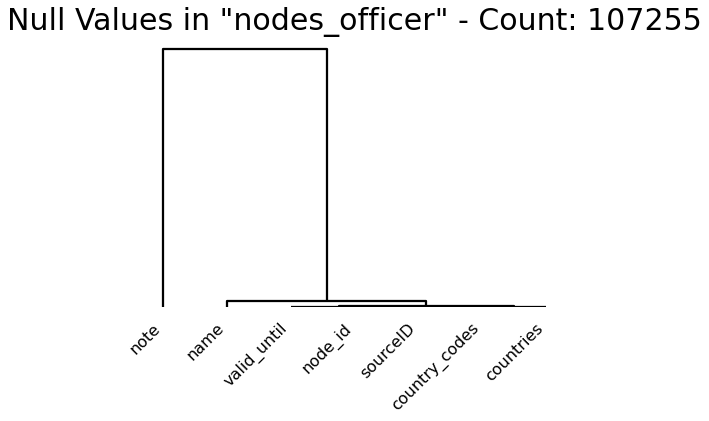

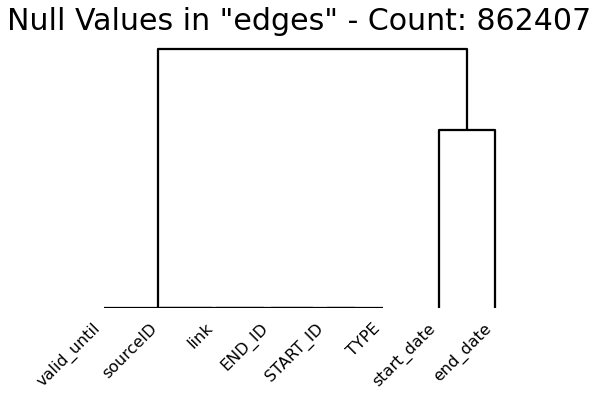

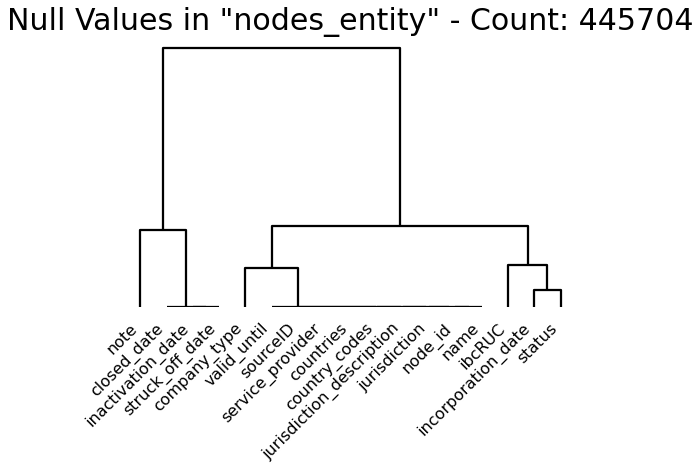

In [ ]:
for name, df in data_frames.items():
  plot_missing_dendrogram(df, name=name, nan_threshold=0, conversions={})

In [ ]:
nodes_data_frames = []

for name, df in data_frames.items():
  print(name)
  if 'node_id' in df.columns:
    node_df = df#[['node_id', 'country_codes', 'countries', 'name', 'address']]
    node_df['table'] = name.replace('nodes_', '')
    print(node_df.shape)
    nodes_data_frames.append(node_df)
nodes = pd.concat(nodes_data_frames)
print(nodes.shape)
display(nodes[nodes.duplicated(subset=['node_id'])]['table'].value_counts())
display(nodes[nodes['node_id']==70884])


nodes_address
(57600, 9)
nodes_intermediary
(9526, 9)
nodes_officer
(107190, 8)
edges
nodes_entity
(105516, 18)
(279832, 19)


officer    1139
Name: table, dtype: int64

,node_id,name,address,country_codes,countries,sourceID,valid_until,note,table,status,jurisdiction,jurisdiction_description,incorporation_date,inactivation_date,struck_off_date,closed_date,ibcRUC,company_type,service_provider
1138,70884,"HUNG, CHIH-FEN",NaN,TWN,Taiwan,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN,intermediary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107135,70884,"HUNG, CHIH-FEN",NaN,TWN,Taiwan,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN,officer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
paths = get_clean_file_paths()
data_frames = read_clean_dataframes()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


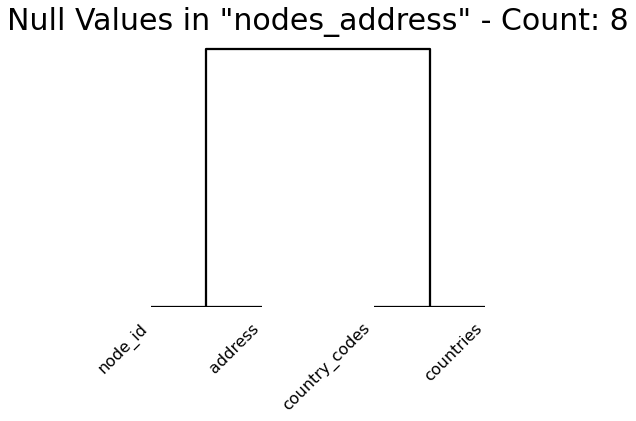

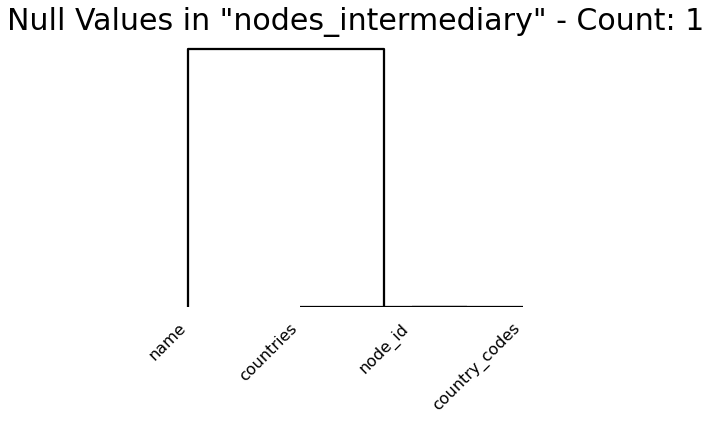

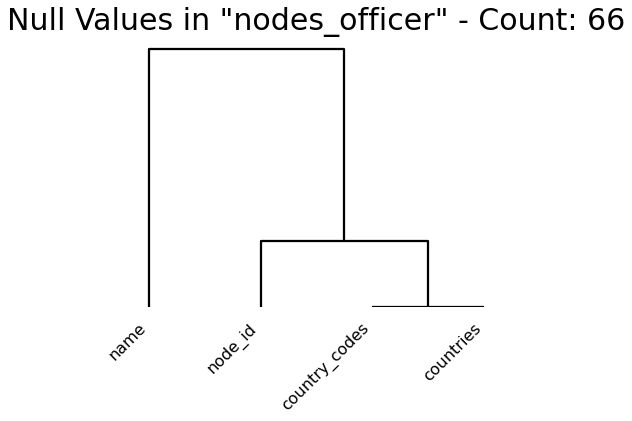

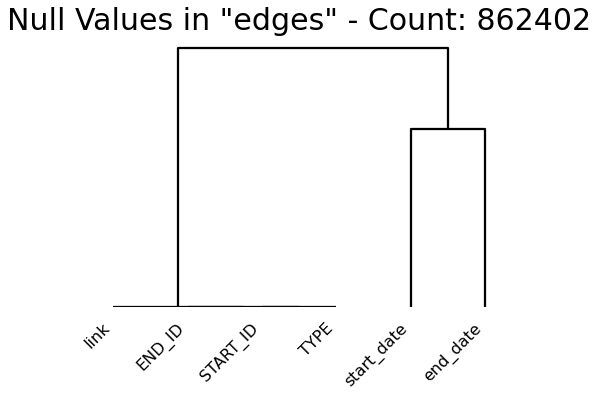

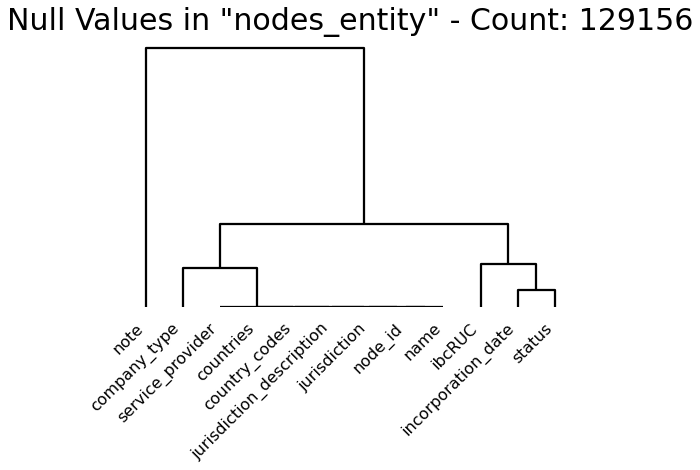

In [ ]:
for name, df in data_frames.items():
  plot_missing_dendrogram(df, name=name, nan_threshold=0, conversions={}, is_clean=True)

In [ ]:
nodes.head()

,node_id,name,address,country_codes,countries,sourceID,valid_until,note,table,status,jurisdiction,jurisdiction_description,incorporation_date,inactivation_date,struck_off_date,closed_date,ibcRUC,company_type,service_provider
0,2004267,NaN,One Bearer Secured Debenture,XXX,Not identified,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN,address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,67277,NaN,"11 Coomber Road, The Peak, Hong Kong",HKG,Hong Kong,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN,address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,67346,NaN,"4 Irish Place 2nd Floor, Gibraltar.",GIB,Gibraltar,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN,address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,67278,NaN,"11A, Branksome 3 Tregunter Path Mid-Levels Hon...",HKG,Hong Kong,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN,address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,67282,NaN,14 Lysander Road West Mailing Kent ME19 4TT,GBR,United Kingdom,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN,address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
country_code_continent_dict = {code: country_to_continent(code) for code in nodes.country_codes.unique()}
nodes['continents'] = nodes.country_codes.map(country_code_continent_dict)

In [ ]:
nodes.head()

,node_id,name,address,country_codes,countries,sourceID,valid_until,note,table,status,jurisdiction,jurisdiction_description,incorporation_date,inactivation_date,struck_off_date,closed_date,ibcRUC,company_type,service_provider,continents
0,2004267,NaN,One Bearer Secured Debenture,XXX,Not identified,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN,address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XXX
1,67277,NaN,"11 Coomber Road, The Peak, Hong Kong",HKG,Hong Kong,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN,address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
2,67346,NaN,"4 Irish Place 2nd Floor, Gibraltar.",GIB,Gibraltar,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN,address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
3,67278,NaN,"11A, Branksome 3 Tregunter Path Mid-Levels Hon...",HKG,Hong Kong,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN,address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
4,67282,NaN,14 Lysander Road West Mailing Kent ME19 4TT,GBR,United Kingdom,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN,address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe


In [ ]:
edges = data_frames['edges'].copy()
edges = edges[['START_ID', 'END_ID', 'TYPE','link', 'start_date', 'end_date']]
edges.head()

,START_ID,END_ID,TYPE,link,start_date,end_date
0,67028,263908,registered_address,registered address,NaN,NaN
1,67243,172931,registered_address,registered address,NaN,NaN
2,67258,264788,registered_address,registered address,NaN,NaN
3,67266,263908,registered_address,registered address,NaN,NaN
4,108050,285718,registered_address,registered address,NaN,NaN


In [ ]:
edges.isnull().sum()

START_ID           0
END_ID             0
TYPE               0
link               0
start_date    331120
end_date      531282
dtype: int64

In [ ]:
edges_info.head()

,START_ID,END_ID,TYPE,link,start_date,end_date,START_country_codes,START_countries,START_table,START_continents,END_country_codes,END_countries,END_table,END_continents
0,67028,263908,registered_address,registered address,NaN,NaN,VGB;CYP,British Virgin Islands;Cyprus,entity,North America;Asia,CYP,Cyprus,address,Asia
1,67243,172931,registered_address,registered address,NaN,NaN,XXX;VGB,Not identified;British Virgin Islands,entity,XXX;North America,XXX,Not identified,address,XXX
2,67258,264788,registered_address,registered address,NaN,NaN,SGP;VGB,Singapore;British Virgin Islands,entity,Asia;North America,SGP,Singapore,address,Asia
3,67266,263908,registered_address,registered address,NaN,NaN,CYP;VGB,Cyprus;British Virgin Islands,entity,Asia;North America,CYP,Cyprus,address,Asia
4,108050,285718,registered_address,registered address,NaN,NaN,USA;XXX,United States;Not identified,entity,North America;XXX,USA,United States,address,North America


In [ ]:
edges.head()

,START_ID,END_ID,TYPE,link,start_date,end_date
0,67028,263908,registered_address,registered address,NaN,NaN
1,67243,172931,registered_address,registered address,NaN,NaN
2,67258,264788,registered_address,registered address,NaN,NaN
3,67266,263908,registered_address,registered address,NaN,NaN
4,108050,285718,registered_address,registered address,NaN,NaN


In [ ]:
nodes.head()

,node_id,name,address,country_codes,countries,sourceID,valid_until,note,table,status,jurisdiction,jurisdiction_description,incorporation_date,inactivation_date,struck_off_date,closed_date,ibcRUC,company_type,service_provider,continents
0,2004267,NaN,One Bearer Secured Debenture,XXX,Not identified,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN,address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XXX
1,67277,NaN,"11 Coomber Road, The Peak, Hong Kong",HKG,Hong Kong,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN,address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
2,67346,NaN,"4 Irish Place 2nd Floor, Gibraltar.",GIB,Gibraltar,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN,address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
3,67278,NaN,"11A, Branksome 3 Tregunter Path Mid-Levels Hon...",HKG,Hong Kong,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN,address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
4,67282,NaN,14 Lysander Road West Mailing Kent ME19 4TT,GBR,United Kingdom,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN,address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe


In [ ]:
#nodes_address[['latitude', 'longitude']] = nodes_address['address'].apply(lambda a: pd.Series(get_longitude_latitude(a)))

In [ ]:
get_longitude_latitude('United States')

{'latitude': 39.7837304, 'longitude': -100.445882}

In [ ]:
# country_lat_longitude = {country: get_longitude_latitude(country) for country in 
#             nodes[nodes.countries.str.split(';').str.len()==1].countries.unique()}
# country_lat_long_df = pd.DataFrame(country_lat_longitude).T.iloc[1:]
# country_lat_long_df.index.name='countries'
# country_lat_long_df.reset_index(inplace=True)
# country_lat_long_df.head()
# country_lat_long_df.to_csv(f'{CLEAN_DATA_PATH}/country_lat_long.csv', index=False)

In [ ]:
country_lat_long_df = pd.read_csv(f'{CLEAN_DATA_PATH}/country_lat_long.csv')
country_lat_long_df.head()

,countries,latitude,longitude
0,Hong Kong,22.279328,114.162813
1,Gibraltar,36.140807,-5.354129
2,United Kingdom,54.702355,-3.276575
3,Australia,-24.776109,134.755000
4,Taiwan,23.973937,120.982018


In [ ]:
nodes = nodes.merge(country_lat_long_df, on='countries', how='left')

In [ ]:
nodes = nodes[['node_id', 'country_codes', 'countries', 
               'continents', 'latitude', 'longitude',
               'status', 'jurisdiction',
               'name', 'address','table', 
       'jurisdiction_description', 'incorporation_date', 'ibcRUC', 'company_type',
       'service_provider']]

In [ ]:
which_node = 'START'

columns = ['country_codes', 'countries', 'table', 'continents']
col_conv = {col: f'{which_node}_{col}' for col in columns}
edges_info = pd.merge(edges, nodes, how='left', left_on=f'{which_node}_ID', right_on='node_id').rename(columns = col_conv)
edges_info.drop(columns=['node_id'], inplace=True)

which_node = 'END'
col_conv = {col: f'{which_node}_{col}' for col in columns}
edges_info = pd.merge(edges_info, nodes, how='left', left_on=f'{which_node}_ID', right_on='node_id').rename(columns = col_conv)
edges_info.drop(columns=['node_id'], inplace=True)

In [ ]:
nodes.to_csv(f'{NODE_EDGES_PATH}/nodes.csv', index=False)
edges.to_csv(f'{NODE_EDGES_PATH}/edges.csv', index=False)
edges_info.to_csv(f'{NODE_EDGES_PATH}/edges_info.csv', index=False)

In [ ]:
nodes.head()

,node_id,country_codes,countries,continents,latitude,longitude,status,jurisdiction,name,address,table,jurisdiction_description,incorporation_date,ibcRUC,company_type,service_provider
0,2004267,XXX,Not identified,XXX,NaN,NaN,NaN,NaN,NaN,One Bearer Secured Debenture,address,NaN,NaN,NaN,NaN,NaN
1,67277,HKG,Hong Kong,Asia,22.279328,114.162813,NaN,NaN,NaN,"11 Coomber Road, The Peak, Hong Kong",address,NaN,NaN,NaN,NaN,NaN
2,67346,GIB,Gibraltar,Europe,36.140807,-5.354129,NaN,NaN,NaN,"4 Irish Place 2nd Floor, Gibraltar.",address,NaN,NaN,NaN,NaN,NaN
3,67278,HKG,Hong Kong,Asia,22.279328,114.162813,NaN,NaN,NaN,"11A, Branksome 3 Tregunter Path Mid-Levels Hon...",address,NaN,NaN,NaN,NaN,NaN
4,67282,GBR,United Kingdom,Europe,54.702354,-3.276575,NaN,NaN,NaN,14 Lysander Road West Mailing Kent ME19 4TT,address,NaN,NaN,NaN,NaN,NaN


In [ ]:
addresses =nodes[nodes['countries']=='United States']['address'].unique()

In [ ]:
addresses

array(['200 Sheridan Ave Suite 103 Palo Alto CA',
       '2241 Johns Circle Arburn, Alabama 36830 USA',
       '540 N. Jackson #201 Glenadale, CA 91206 U.S.A', ...,
       'P O Box 611090 San Jose California 95161 USA',
       '10835 E. 15th St Tulsa, Oklahoma 74128 USA', nan], dtype=object)

In [ ]:
address_lat_long = {}

for address in addresses[:20]:
  address = address.replace('U.S.A', 'USA').replace('USA.', 'USA')
  out = get_longitude_latitude(address)
  if out!=None:
    address_lat_long.update({address: out})


In [ ]:
address_lat_long

{'10 Rue Verte Newport Beach California 92660 USA': {'latitude': 33.6183583,
  'longitude': -117.865322},
 '1102 Silver Lake Road Cary, IL 60013 USA': {'latitude': 42.218962714285716,
  'longitude': -88.24913397959183},
 '1743 Glenview Alvin, TX 77511 USA': {'latitude': 29.40635027994184,
  'longitude': -95.24570660797701},
 '178 Broad Street, San Francisco, CA 94112, USA': {'latitude': 37.71340605,
  'longitude': -122.45831083439829},
 '2138 Holmby Avenue Los Angeles, CA 90025 USA': {'latitude': 34.05038070402419,
  'longitude': -118.42397669710738},
 '22289 Janice Ave Cupertino CA 95014-2702.': {'latitude': 37.3202707,
  'longitude': -122.0650158},
 '2250 Bermuda Dunes Place Oxnard, CA 93036': {'latitude': 34.22533926897611,
  'longitude': -119.2040356097221},
 '2381 Nordic Turlock, CA 95380 USA': {'latitude': 37.513040272727274,
  'longitude': -120.82296454545454},
 '3013 Mustang Drive, Madison Lake, mn,56063, USA': {'latitude': 44.208085977458246,
  'longitude': -93.82913815872797}

In [ ]:
#!pip install geotext

     |████████████████████████████████| 2.0 MB 5.2 MB/s 


In [ ]:
from geotext import GeoText

In [ ]:
places = GeoText('200 Sheridan Ave Suite 103 Palo Alto CA, USA')
cities = list(places.cities)

In [ ]:
cities_dict = {}
for address in addresses:
  try:
    places = GeoText(address)

    cities = list(places.cities)

    cities_dict.update({address: cities})
  except Exception as e:
    print(e)
    print(address)

expected string or bytes-like object
nan


In [ ]:
#cities_dict

In [ ]:
#https://stackoverflow.com/questions/48675105/how-to-extract-city-state-from-a-column-in-pandas-dataframe

def get_city_state(address):
  state = None
  city = None
  zip = None
  try:
    import re    
    pattern = r"[A-Z][a-z]+,?\s[A-Z]{2}"
    pattern = r",?\s([A-Z]{2,}|[A-Z][a-z]+),?\s\d{5}-?"
    places = GeoText(address)
    matches = re.finditer(pattern, address, re.MULTILINE)
    for match in matches:
        state, zip = match.group().replace(",", "").split()
        #print(", ".join([city, state]))
  except Exception as e:
    pass
  return {'zip': zip,
          'state': state}

In [ ]:
city_state_dict = {}

for address in addresses[:-1]:
  if address:
    out = get_city_state(address)
    if out['state']!=None:
      city_state_dict.update({address: out})

In [ ]:
us_address_zip_state = pd.DataFrame(city_state_dict).T
us_address_zip_state['state'] = us_address_zip_state['state'].replace({'CALIF': 'CA', 'CALIFONIA': 'CA', 'Calfornia':'CA', 'CALIFONIA': 'CA'})
us_address_zip_state['state'] = us_address_zip_state['state'].str.upper()
us_address_zip_state['state'] = us_address_zip_state['state'].map(us_state_abbrev,'newstate')
us_address_zip_state['state'].unique()

array(['AL', 'CA', 'IL', 'TX', nan, 'NY', 'FL', 'NV', 'GA', 'OH', 'OR',
       'MA', 'IN', 'AZ', 'TN', 'UT', 'PA', 'CT', 'NJ', 'ID', 'VA', 'MD',
       'MI', 'NC', 'MO', 'MS', 'NM', 'CO', 'KS', 'WA', 'OK', 'HI', 'WY',
       'SD', 'ME', 'NE', 'MN', 'DE', 'WI', 'RI', 'NH', 'LA', 'IA', 'KY',
       'DC', 'MT', 'WV', 'VI', 'SC', 'AR', 'AK', 'PR', 'MP'], dtype=object)

In [ ]:
us_state_abbrev = {'Alabama': 'AL', 'Alaska': 'AK', 'American Samoa': 'AS', 'Arizona': 'AZ', 'Arkansas': 'AR', 
                   'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 
                   'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Guam': 'GU', 
                   'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 
                   'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 
                   'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 
                   'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 
                   'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 
                   'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 
                   'Northern Mariana Islands': 'MP', 'Ohio': 'OH', 'Oklahoma': 'OK', 
                   'Oregon': 'OR', 'Pennsylvania': 'PA', 'Puerto Rico': 'PR', 'Rhode Island': 'RI', 
                   'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 
                   'Utah': 'UT', 'Vermont': 'VT', 'Virgin Islands': 'VI', 'Virginia': 'VA', 
                   'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'Washington D.C.': 'DC'}

In [ ]:
us_state_abbrev = {k.upper(): v for k, v in us_state_abbrev.items()}
us_state_abbrev.update({v: v for v in us_state_abbrev.values()})

In [ ]:
us_address_zip_state['new address'] = us_address_zip_state['state'] +', USA'

In [ ]:
us_address_zip_state

,zip,state,new address
address,,,
"2241 Johns Circle Arburn, Alabama 36830 USA",36830,AL,"AL, USA"
"540 N. Jackson #201 Glenadale, CA 91206 U.S.A",91206,CA,"CA, USA"
10 Rue Verte Newport Beach California 92660 USA,92660,CA,"CA, USA"
"100 CITIDEL DRIVE SUITE 111 COMMERCE, CA 90040",90040,CA,"CA, USA"
"11 East Napa Street Suite 2 Sonoma, CA 95476",95476,CA,"CA, USA"
...,...,...,...
"12 Pinehurst Lane Newport Beach, CA 92660 USA",92660,CA,"CA, USA"
"1011 Camino Del Rio South #400 San Diego, CA 92108",92108,CA,"CA, USA"
"10339 South 2420 East Sandy, UT 84092 U.S.A.",84092,UT,"UT, USA"


In [ ]:
address_lat_long = {}

for address in us_address_zip_state['new address'].unique():
    try:
      out = get_longitude_latitude(address)
      if out!=None:
        address_lat_long.update({address: out})
    except Exception as e:
      print(e)


Service timed out


In [ ]:
address_lat_long = {k: v for k, v in address_lat_long.items() if type(k)==str}

In [ ]:
state_us_long_lat = pd.DataFrame(address_lat_long).T
state_us_long_lat.index.name = 'new address'
state_us_long_lat.reset_index(inplace=True)

In [ ]:
us_address_lat_long = us_address_zip_state.reset_index().merge(state_us_long_lat, on='new address')[['address', 'latitude', 'longitude']]

In [ ]:
us_address_long_lat = pd.DataFrame(address_lat_long).T

In [ ]:
to_extend = us_address_long_lat.join(us_address_zip_state, how='right')[['latitude', 'longitude', 'state']]

In [ ]:
to_extend.shape

(3170, 3)

In [ ]:
to_extend.index.name='address'
to_extend.reset_index(inplace=True)

In [ ]:
to_extend = to_extend[['address', 'state']]

In [ ]:
to_extend

,address,state
0,"2241 Johns Circle Arburn, Alabama 36830 USA",AL
1,"540 N. Jackson #201 Glenadale, CA 91206 U.S.A",CA
2,10 Rue Verte Newport Beach California 92660 USA,CA
3,"100 CITIDEL DRIVE SUITE 111 COMMERCE, CA 90040",CA
4,"11 East Napa Street Suite 2 Sonoma, CA 95476",CA
...,...,...
3165,"12 Pinehurst Lane Newport Beach, CA 92660 USA",CA
3166,"1011 Camino Del Rio South #400 San Diego, CA 9...",CA
3167,"10339 South 2420 East Sandy, UT 84092 U.S.A.",UT
3168,P O Box 611090 San Jose California 95161 USA,CA


In [ ]:
nodes = nodes.merge(to_extend, on='address', how='left')

In [ ]:
nodes = nodes.merge(us_address_lat_long, on='address', how='left')

In [ ]:
nodes.loc[nodes['countries']=='United States','latitude']= nodes['latitude_y']

In [ ]:
nodes.loc[nodes['countries']=='United States','longitude']= nodes['longitude_y']

In [ ]:
nodes.loc[nodes['countries']!='United States','latitude']= nodes['latitude_x']
nodes.loc[nodes['countries']!='United States','longitude']= nodes['longitude_x']

In [ ]:
nodes.drop(columns=['longitude_x', 'longitude_y', 'latitude_x', 'latitude_y'], inplace=True)
nodes.head()

,node_id,country_codes,countries,continents,status,jurisdiction,name,address,table,jurisdiction_description,incorporation_date,ibcRUC,company_type,service_provider,state,latitude,longitude
0,2004267,XXX,Not identified,XXX,NaN,NaN,NaN,One Bearer Secured Debenture,address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,67277,HKG,Hong Kong,Asia,NaN,NaN,NaN,"11 Coomber Road, The Peak, Hong Kong",address,NaN,NaN,NaN,NaN,NaN,NaN,22.279328,114.162813
2,67346,GIB,Gibraltar,Europe,NaN,NaN,NaN,"4 Irish Place 2nd Floor, Gibraltar.",address,NaN,NaN,NaN,NaN,NaN,NaN,36.140807,-5.354129
3,67278,HKG,Hong Kong,Asia,NaN,NaN,NaN,"11A, Branksome 3 Tregunter Path Mid-Levels Hon...",address,NaN,NaN,NaN,NaN,NaN,NaN,22.279328,114.162813
4,67282,GBR,United Kingdom,Europe,NaN,NaN,NaN,14 Lysander Road West Mailing Kent ME19 4TT,address,NaN,NaN,NaN,NaN,NaN,NaN,54.702354,-3.276575


In [ ]:
nodes.to_csv(f'{NODE_EDGES_PATH}/nodes.csv', index=False)

In [ ]:
edges_info.drop_duplicates(subset=['START_ID', 'END_ID', 'TYPE', 'link', 'start_date', 'end_date'], inplace=True)

In [ ]:
edges_info.to_csv(f'{NODE_EDGES_PATH}/edges_info.csv', index=False)